<a href="https://colab.research.google.com/github/RDifault/Machine-and-Deep-Learning-Projects/blob/main/Fuzzy-C-Means_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install fuzzy_c_means
!pip install -U scikit-fuzz

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
ERROR: Could not find a version that satisfies the requirement scikit-fuzz (from versions: none)
ERROR: No matching distribution found for scikit-fuzz


#Import Library

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from fcmeans import FCM
from sklearn.preprocessing import LabelEncoder
import seaborn as sn
from seaborn import scatterplot as scatter
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
import skfuzzy as fuzz

ModuleNotFoundError: ignored

#Read Dataset

In [ ]:
df = pd.read_csv('Country-data.csv')

df.head()

NameError: ignored

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     167 non-null    object 
 1   child_mort  167 non-null    float64
 2   exports     167 non-null    float64
 3   health      167 non-null    float64
 4   imports     167 non-null    float64
 5   income      167 non-null    int64  
 6   inflation   167 non-null    float64
 7   life_expec  167 non-null    float64
 8   total_fer   167 non-null    float64
 9   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


In [ ]:
df['country'] = LabelEncoder().fit_transform(df['country'])
df

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,0,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,1,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,2,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,3,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,4,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200
...,...,...,...,...,...,...,...,...,...,...
162,162,29.2,46.6,5.25,52.7,2950,2.62,63.0,3.50,2970
163,163,17.1,28.5,4.91,17.6,16500,45.90,75.4,2.47,13500
164,164,23.3,72.0,6.84,80.2,4490,12.10,73.1,1.95,1310
165,165,56.3,30.0,5.18,34.4,4480,23.60,67.5,4.67,1310


In [ ]:
print(df.shape)
df.head()

(167, 10)


,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,0,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,1,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,2,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,3,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,4,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


#Korelasi Data

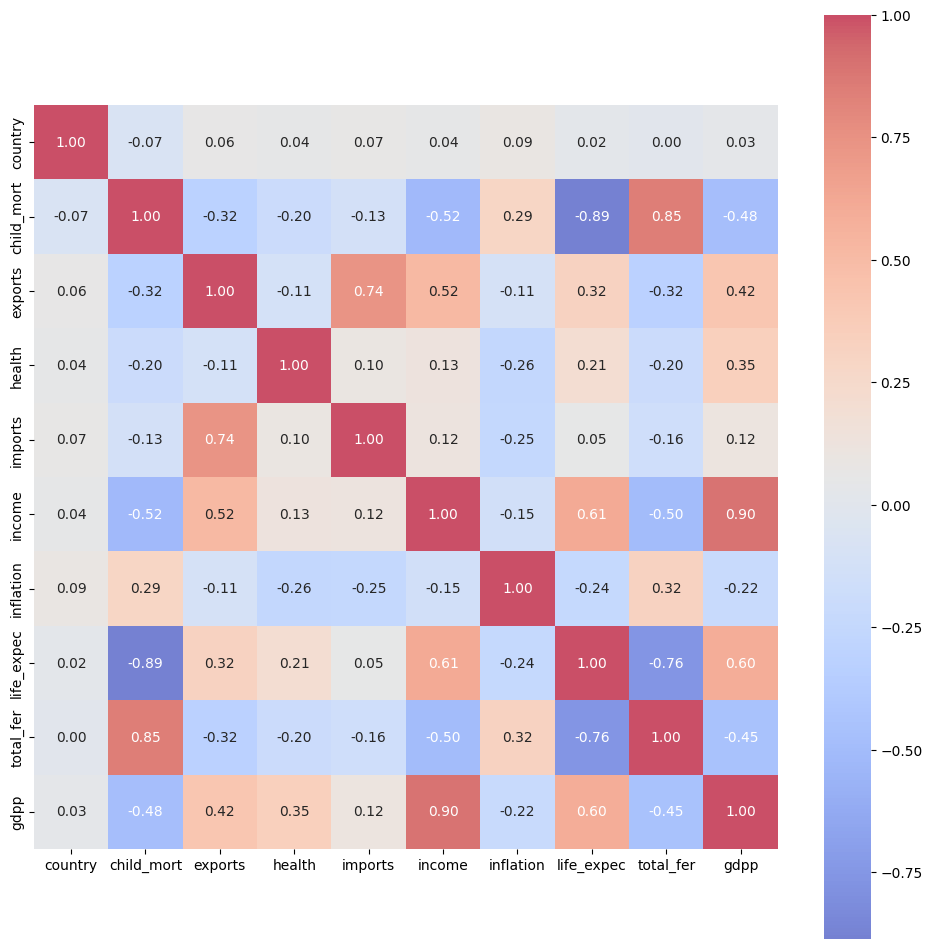

In [ ]:
plt.figure(figsize=(12,12))
sn.heatmap(df.corr(), cbar = True,  square = True, annot=True, fmt= '.2f',
           alpha = 0.7,   cmap= 'coolwarm')
plt.show()

#Feature Engineering

##Min-Max Scaler

In [ ]:
scaler=MinMaxScaler((-1,1))
df = scaler.fit_transform(df)

df

array([[-1.        , -0.14703019, -0.90103606, ..., -0.04930966,
         0.47318612, -0.99385314],
       [-0.98795181, -0.86368062, -0.72093791, ...,  0.74358974,
        -0.84227129, -0.92633317],
       [-0.97590361, -0.75949367, -0.6168812 , ...,  0.75147929,
        -0.4511041 , -0.91927001],
       ...,
       [ 0.97590361, -0.79844206, -0.28069798, ...,  0.617357  ,
        -0.74763407, -0.9794023 ],
       [ 0.98795181, -0.47711782, -0.70092701, ...,  0.3964497 ,
         0.11041009, -0.9794023 ],
       [ 1.        , -0.21616358, -0.63088883, ..., -0.21499014,
         0.34069401, -0.97653886]])

##PCA

In [ ]:
pca = PCA()
df_pca = pca.fit_transform(df)

In [ ]:
print("Cumulative Variances (Percentage):")
print(pca.explained_variance_ratio_.cumsum() * 100)
print()

Cumulative Variances (Percentage):
[ 41.47400498  66.28254605  76.31683648  85.57212597  92.89622688
  95.69932178  97.93810765  98.81089784  99.47791722 100.        ]



In [ ]:
df_pca

array([[-1.26807075, -0.88866696,  0.23651906, ..., -0.18220007,
         0.09097423,  0.05023215],
       [ 0.24235426, -1.02722215, -0.37491855, ...,  0.05879243,
         0.06607921,  0.06158606],
       [-0.06513153, -0.9836061 , -0.22242476, ...,  0.05745615,
        -0.01531299,  0.00793887],
       ...,
       [ 0.30305607,  0.96800241, -0.11643579, ...,  0.10444465,
        -0.0194328 , -0.03784118],
       [-0.59070943,  1.04113682, -0.09038342, ...,  0.00128375,
         0.02337755, -0.02464931],
       [-1.07026651,  1.09322845,  0.16588048, ..., -0.2449151 ,
        -0.10817892, -0.13322673]])

#Fuzzy C-Means

##Without PCA

In [ ]:
fcm = FCM(n_clusters=2, m=2, error=0.005, max_iter=1000)
fcm.fit(df)

fcm_centers = fcm.centers
fcm_labels = fcm.u.argmax(axis=1)

In [ ]:
print(fcm_centers)
print(fcm_labels)

[[ 0.02162377 -0.3818888  -0.65876116 -0.4560947  -0.48790399 -0.86998167
  -0.7383652   0.27812118 -0.08363723 -0.89601036]
 [-0.02761496 -0.85436893 -0.54173238 -0.31030029 -0.44495156 -0.63325354
  -0.81860455  0.69894107 -0.69099792 -0.65027265]]
[0 1 1 0 1 1 1 1 1 1 1 1 0 1 1 1 1 0 1 0 1 0 1 1 1 0 0 0 0 1 1 0 0 1 1 1 0
 0 0 1 0 1 1 1 1 1 1 0 1 0 0 1 1 1 1 0 0 1 1 0 1 1 0 0 0 0 0 1 1 0 0 1 0 1
 1 1 1 1 1 1 0 0 1 0 0 1 1 0 0 1 1 1 1 0 0 1 1 0 1 0 1 0 1 0 1 1 0 0 0 0 1
 1 0 0 1 1 0 1 1 1 0 1 1 1 1 1 0 0 1 0 1 1 0 1 1 1 0 0 1 1 1 1 0 1 1 1 0 0
 1 0 0 0 1 1 0 0 1 1 1 1 1 0 0 1 1 0 0]


##Plotting

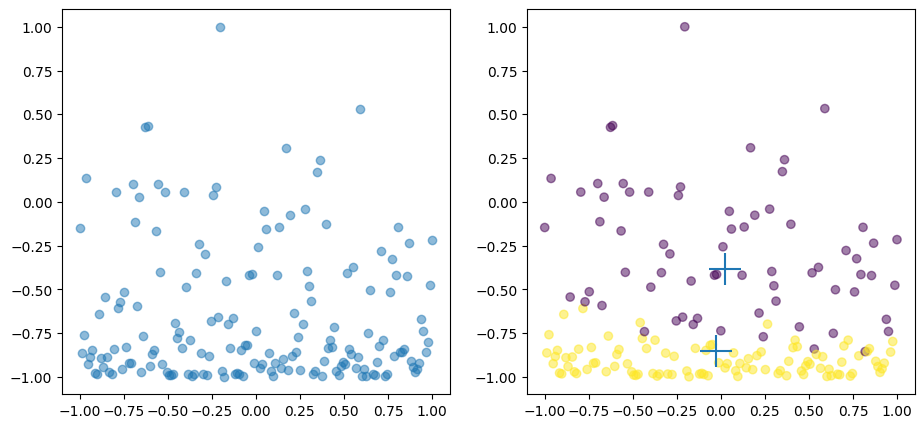

In [ ]:
%matplotlib inline
f, axes = plt.subplots(1, 2, figsize=(11,5))
axes[0].scatter(df[:,0], df[:,1], alpha=.5)
axes[1].scatter(df[:,0], df[:,1], c=fcm_labels, alpha=.5)
axes[1].scatter(fcm_centers[:,0], fcm_centers[:,1], marker="+", s=500)

plt.show()

##With PCA

In [ ]:
fcm = FCM(n_clusters=2, m=2, error=0.005, max_iter=1000)
fcm.fit(df_pca)

fcm_centers = fcm.centers
fcm_labels = fcm.u.argmax(axis=1)

In [ ]:
print(fcm_centers)
print(fcm_labels)

[[ 0.40548971 -0.06305965 -0.05126434  0.00750823 -0.0159421   0.00104154
   0.00292647  0.00740245 -0.00627149  0.00366544]
 [-0.54088257  0.06780873  0.0682864   0.00515403  0.01724738 -0.00409595
  -0.01567324 -0.00720886  0.00526187 -0.00521611]]
[1 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 1 0 1 0 0 0 1 1 1 1 0 0 1 1 0 0 0 1
 1 1 0 1 0 0 0 0 0 0 1 0 1 1 0 0 0 0 1 1 0 0 1 0 0 1 1 1 1 1 0 0 1 1 0 1 0
 0 0 0 0 0 0 1 1 0 1 1 0 0 1 1 0 0 0 0 1 1 0 0 1 0 1 0 1 0 1 0 0 1 1 1 1 0
 0 1 1 0 0 1 0 0 0 1 0 0 0 0 0 1 1 0 1 0 0 1 0 0 0 1 1 0 0 0 0 1 0 0 0 1 1
 0 1 1 1 0 0 1 1 0 0 0 0 0 1 1 0 0 1 1]


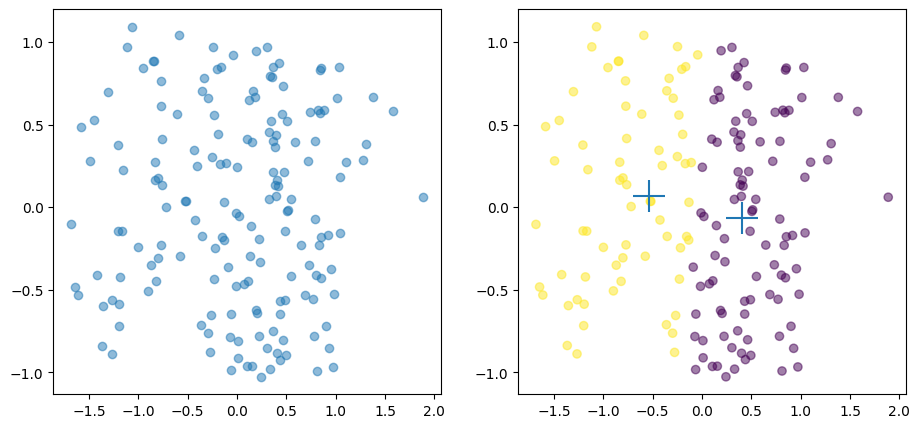

In [ ]:
%matplotlib inline
f, axes = plt.subplots(1, 2, figsize=(11,5))
axes[0].scatter(df_pca[:,0], df_pca[:,1], alpha=.5)
axes[1].scatter(df_pca[:,0], df_pca[:,1], c=fcm_labels, alpha=.5)
axes[1].scatter(fcm_centers[:,0], fcm_centers[:,1], marker="+", s=500)

plt.show()